In [ ]:
#import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import plotly.express as px

# Data Preparation

In [ ]:
#import csv file of EV Database
df_car = pd.read_csv('https://raw.githubusercontent.com/amandaabidah/csv_database/main/EV%20Germany_new_new.csv')
df_car.head()

,Model,Usable Battery,Year,Acceleration,Top Speed,Range,Efficiency,Charging Speed,Price (€)
0,Tesla Model Y Long Range Dual Motor,75.0,Available since February 2022,5.0 sec,217 km/h,435 km,172 Wh/km,670 km/h,"€59,017"
1,Tesla Model 3,57.5,Available since December 2021,6.1 sec,225 km/h,405 km,142 Wh/km,680 km/h,"€44,668"
2,BYD ATTO 3,60.5,Available since August 2022,7.3 sec,160 km/h,330 km,183 Wh/km,370 km/h,"€44,625"
3,Tesla Model Y,57.5,Available since November 2022,6.9 sec,217 km/h,350 km,164 Wh/km,580 km/h,"€47,567"
4,Tesla Model 3 Long Range Dual Motor,75.0,Available since November 2021,4.4 sec,233 km/h,485 km,155 Wh/km,750 km/h,"€53,668"


In [ ]:
df_car['Charging capacity'] = df_car['Charging Speed']
df_car.drop(['Charging Speed'], axis=1, inplace=True)
df_car['Year'] = df_car['Year'].str.split().str[-1]
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Model              350 non-null    object 
 1   Usable Battery     350 non-null    float64
 2   Year               350 non-null    object 
 3   Acceleration       350 non-null    object 
 4   Top Speed          350 non-null    object 
 5   Range              350 non-null    object 
 6   Efficiency         350 non-null    object 
 7   Price (€)          309 non-null    object 
 8   Charging capacity  350 non-null    object 
dtypes: float64(1), object(8)
memory usage: 24.7+ KB


In [ ]:
df_car

df_car.to_csv('df_car.csv', index=False)

In [ ]:
df_car_model = df_car.drop(df_car[df_car['Charging capacity'] == '-'].index)
df_car_model.drop(['Price (€)'], axis=1, inplace=True)
df_car_model

,Model,Usable Battery,Year,Acceleration,Top Speed,Range,Efficiency,Charging capacity
0,Tesla Model Y Long Range Dual Motor,75.0,2022,5.0 sec,217 km/h,435 km,172 Wh/km,670 km/h
1,Tesla Model 3,57.5,2021,6.1 sec,225 km/h,405 km,142 Wh/km,680 km/h
2,BYD ATTO 3,60.5,2022,7.3 sec,160 km/h,330 km,183 Wh/km,370 km/h
3,Tesla Model Y,57.5,2022,6.9 sec,217 km/h,350 km,164 Wh/km,580 km/h
4,Tesla Model 3 Long Range Dual Motor,75.0,2021,4.4 sec,233 km/h,485 km,155 Wh/km,750 km/h
...,...,...,...,...,...,...,...,...
345,Fiat E-Ulysse L3 50 kWh,46.3,2022,12.1 sec,130 km/h,180 km,257 Wh/km,290 km/h
346,Porsche Taycan 4S Plus Sport Turismo,83.7,2022,4.0 sec,250 km/h,430 km,195 Wh/km,1060 km/h
347,Porsche Taycan Turbo Sport Turismo,83.7,2022,3.2 sec,260 km/h,405 km,207 Wh/km,1000 km/h
348,Peugeot e-Expert Combi Standard 50 kWh,46.3,2021,13.1 sec,130 km/h,185 km,250 Wh/km,290 km/h


In [ ]:
unit_sec = 'sec'
df_car_model['Acceleration'] = [sub.replace(unit_sec, "").strip() for sub in df_car_model['Acceleration']]

unit_speed = 'km/h'
df_car_model['Top Speed'] = [sub.replace(unit_speed, "").strip() for sub in df_car_model['Top Speed']]

unit_range = 'km'
df_car_model['Range'] = [sub.replace(unit_range, "").strip() for sub in df_car_model['Range']]

unit_efficient = 'Wh/km'
df_car_model['Efficiency'] = [sub.replace(unit_efficient, "").strip() for sub in df_car_model['Efficiency']]

unit_charge = 'km/h'
df_car_model['Charging capacity'] = [sub.replace(unit_charge, "").strip() for sub in df_car_model['Charging capacity']]

df_car_model['Acceleration'] = df_car_model['Acceleration'].astype(float)
df_car_model['Top Speed'] = df_car_model['Top Speed'].astype(float)
df_car_model['Range'] = df_car_model['Range'].astype(float)
df_car_model['Efficiency'] = df_car_model['Efficiency'].astype(float)
df_car_model['Charging capacity'] = df_car_model['Charging capacity'].astype(float)

In [ ]:
df_car_model['Charging Speed (hour)'] = df_car_model['Range'] / df_car_model['Charging capacity']
df_car_model.head()

# Save pre-processed file to CSV
df_car_model.to_csv('df_car_model.csv', index=False)

In [ ]:
df_car_model.drop_duplicates()
df_car_model.isnull().sum()

Model                    0
Usable Battery           0
Year                     0
Acceleration             0
Top Speed                0
Range                    0
Efficiency               0
Charging capacity        0
Charging Speed (hour)    0
dtype: int64

In [ ]:
df_car_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 348 entries, 0 to 349
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Model                  348 non-null    object 
 1   Usable Battery         348 non-null    float64
 2   Year                   348 non-null    object 
 3   Acceleration           348 non-null    float64
 4   Top Speed              348 non-null    float64
 5   Range                  348 non-null    float64
 6   Efficiency             348 non-null    float64
 7   Charging capacity      348 non-null    float64
 8   Charging Speed (hour)  348 non-null    float64
dtypes: float64(7), object(2)
memory usage: 27.2+ KB


In [ ]:
# Import Dataset 2 'Electric Vehicle Population Data'
df_pop = pd.read_csv('https://data.wa.gov/api/views/f6w7-q2d2/rows.csv')
df_pop.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5UXTA6C03P,King,Seattle,WA,98177.0,2023,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30,0,36.0,218985539,POINT (-122.38242499999996 47.77279000000004),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
1,1FMCU0EZXN,Yakima,Moxee,WA,98936.0,2022,FORD,ESCAPE,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,15.0,197264322,POINT (-120.37951169999997 46.55609000000004),PACIFICORP,5.307700e+10
2,1G1FW6S03J,King,Seattle,WA,98117.0,2018,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,36.0,168549727,POINT (-122.37275999999997 47.689685000000054),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
3,5YJSA1AC0D,King,Newcastle,WA,98059.0,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,69900,41.0,244891062,POINT (-122.15733999999998 47.487175000000036),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,1FADP5CU8F,Kitsap,Bremerton,WA,98312.0,2015,FORD,C-MAX,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,19,0,26.0,134915000,POINT (-122.65223 47.57192),PUGET SOUND ENERGY INC,5.303508e+10


In [ ]:
df_pop.shape

(143596, 17)

In [ ]:
df_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143596 entries, 0 to 143595
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         143596 non-null  object 
 1   County                                             143574 non-null  object 
 2   City                                               143574 non-null  object 
 3   State                                              143596 non-null  object 
 4   Postal Code                                        143574 non-null  float64
 5   Model Year                                         143596 non-null  int64  
 6   Make                                               143596 non-null  object 
 7   Model                                              143596 non-null  object 
 8   Electric Vehicle Type                              143596 non-null  object

In [ ]:
df_pop.isna().sum()

VIN (1-10)                                             0
County                                                22
City                                                  22
State                                                  0
Postal Code                                           22
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 327
DOL Vehicle ID                                         0
Vehicle Location                                      25
Electric Utility                                      22
2020 Census Tract                                     22
dtype: int64

In [ ]:
columns = ['Electric Utility', 'Legislative District', 'Vehicle Location', '2020 Census Tract', 'City', 'Postal Code', 'County']
df_pop.dropna(subset=columns, inplace=True)

df_pop.reset_index(drop=True, inplace=True)

df_pop.isnull().sum()

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64

In [ ]:
df_pop_model = df_pop.drop(df_pop[df_pop['Electric Range'] == '0'].index)
df_pop_model

df_pop_model.to_csv('df_pop_model.csv', index=False)

In [ ]:
df_car_split = df_car.copy()
df_car_split['Make'] = df_car['Model'].str.split().str[0]
df_car_split['Model'] = df_car['Model'].str.split().str[1:]
df_car_split['Model'] = df_car_split['Model'].str.join(' ')
df_car_split

df_car_split.to_csv('df_car_split.csv', index=False)

# Exploration Data Analysis




> **Electric Vehicle Population Dataset**



In [ ]:
df_pop.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,143266.000000,143266.000000,143266.000000,143266.000000,143266.000000,1.432660e+05,1.432660e+05
mean,98258.420965,2019.866926,70.485419,1372.484190,29.371965,2.092281e+08,5.303966e+10
std,302.056629,3.016107,97.121995,9445.067466,14.823978,8.353968e+07,1.616041e+07
min,98001.000000,1997.000000,0.000000,0.000000,1.000000,4.385000e+03,5.300195e+10
25%,98052.000000,2018.000000,0.000000,0.000000,18.000000,1.668815e+08,5.303301e+10
50%,98122.000000,2021.000000,19.000000,0.000000,33.000000,2.111311e+08,5.303303e+10
75%,98370.000000,2022.000000,111.000000,0.000000,43.000000,2.364567e+08,5.305307e+10
max,99403.000000,2024.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.307794e+10


In [ ]:
#show the top 5 number of cars per state
df_pop['State'].value_counts().head(5)

WA    143266
Name: State, dtype: int64

Based on the second dataset, it shows that **the highest number of register EV in US were in Washington**. One of the significant factor which influence this condition is the updated zero-emission vehicle program by The Washington Department of Ecology. Through this program, automakers can earn credits for selling ZEVs in model years 2023 and 2024. These credits can be used to offset the number of ZEVs they need to sell in later years.




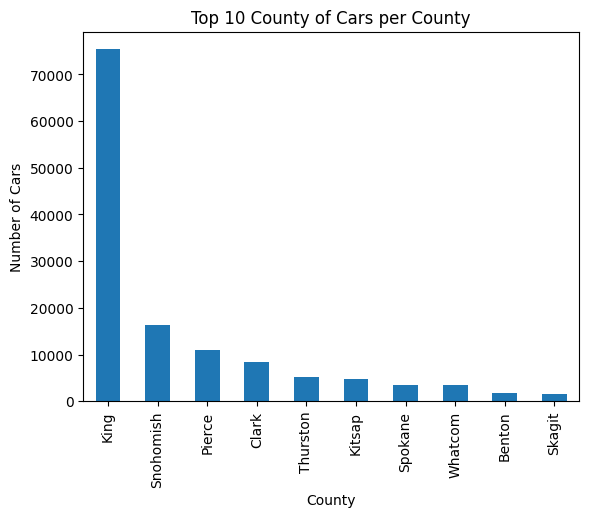

,County
King,75383
Snohomish,16429
Pierce,11017
Clark,8451
Thurston,5097
Kitsap,4725
Spokane,3542
Whatcom,3529
Benton,1756
Skagit,1599


In [ ]:
car_counts = df_pop['County'].value_counts().nlargest(10)

# plot the counts
car_counts.plot(kind='bar')
plt.xlabel('County')
plt.ylabel('Number of Cars')
plt.title('Top 10 County of Cars per County')
plt.show()

car_counts_df = car_counts.to_frame()
car_counts_df.style.background_gradient(cmap='Greens')

King county with 75K cars stands at the top


In [ ]:
df_pop=df_pop.astype({'Postal Code':'int'},{'Legislative District':'int'})

In [ ]:
 pd.DataFrame(df_pop.groupby(['Model','Make'], sort=False)['Electric Range'].max().sort_values(ascending = False)).reset_index().head(10)

,Model,Make,Electric Range
0,MODEL S,TESLA,337
1,MODEL 3,TESLA,322
2,MODEL X,TESLA,293
3,MODEL Y,TESLA,291
4,BOLT EV,CHEVROLET,259
5,KONA,HYUNDAI,258
6,ROADSTER,TESLA,245
7,NIRO,KIA,239
8,I-PACE,JAGUAR,234
9,PS2,POLESTAR,233


diketahui electric range tesla model S paling tinggi

In [ ]:
popular_models = df_pop['Model'].value_counts()
print("\nPopular Electric Vehicle Models:\n")
popular_models.head(5)


Popular Electric Vehicle Models:



MODEL 3    26684
MODEL Y    26148
LEAF       13078
MODEL S     7523
BOLT EV     5593
Name: Model, dtype: int64

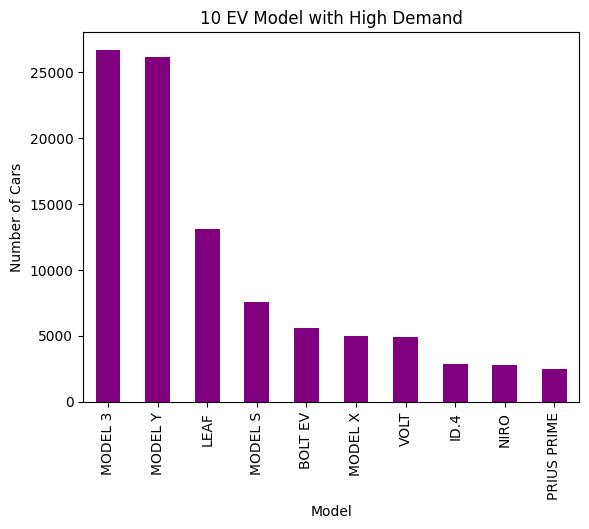

,Model
MODEL 3,26684
MODEL Y,26148
LEAF,13078
MODEL S,7523
BOLT EV,5593
MODEL X,4994
VOLT,4869
ID.4,2831
NIRO,2757
PRIUS PRIME,2498


In [ ]:
model_counts = df_pop['Model'].value_counts().nlargest(10)

# plot the counts
model_counts.plot(kind='bar', color = 'purple')
plt.xlabel('Model')
plt.ylabel('Number of Cars')
plt.title('10 EV Model with High Demand')
plt.show()

model_counts_df = model_counts.to_frame()
model_counts_df.style.background_gradient(cmap='Purples')

In [ ]:
range_df = pd.DataFrame(df_pop.groupby(['Model','Make'], sort=False)['Electric Range'].max().sort_values(ascending = False)).reset_index().head(10)
px.histogram(range_df, x = 'Model', y = 'Electric Range',color = 'Make',
             title = 'Top ten in Electric Range',
            color_discrete_sequence=px.colors.qualitative.Pastel)
# range_df.columns


Tesla has the highest electric range for model S

In [ ]:
range_df = df_pop[df_pop['Electric Range'] != 0]
range_df = pd.DataFrame(range_df.groupby(['Model','Make'], sort=False)['Electric Range'].max().sort_values(ascending = False)).reset_index().tail(10)
px.histogram(range_df, x = 'Model', y = 'Electric Range',color = 'Make',
             title = 'Bottom ten in Electric Range',
            color_discrete_sequence=px.colors.qualitative.Pastel)

Toyota has di the lowest electric range for model Prius plug-in

In [ ]:
price_df = pd.DataFrame(df_pop.groupby(['Model','Make'], sort=False)['Base MSRP'].max().sort_values(ascending = False)).reset_index().head(10)
px.histogram(price_df, x = 'Model', y = 'Base MSRP',color = 'Make',
             title = 'The 10 most expensive cars',
            color_discrete_sequence=px.colors.qualitative.Pastel)

In [ ]:
price_df = df_pop[df_pop['Base MSRP'] != 0]
price_df = pd.DataFrame(price_df.groupby(['Model','Make'], sort=False)['Base MSRP'].max().sort_values(ascending = False)).reset_index().tail(10)
px.histogram(price_df, x = 'Model', y = 'Base MSRP',color = 'Make',
             title = 'The 10 lowest Price cars',
            color_discrete_sequence=px.colors.qualitative.Pastel)

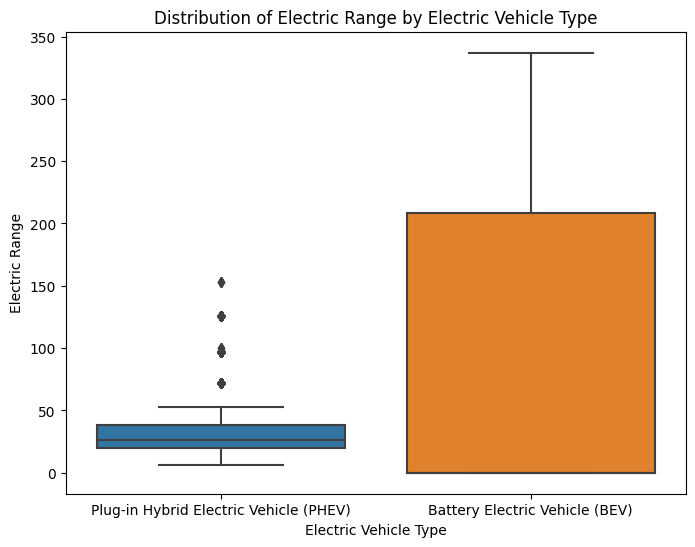

In [ ]:
# adjust figure size
plt.figure(figsize=(8, 6))

# create a box plot
sns.boxplot(x='Electric Vehicle Type', y='Electric Range', data = df_pop)
plt.xlabel('Electric Vehicle Type')
plt.ylabel('Electric Range')
plt.title('Distribution of Electric Range by Electric Vehicle Type')
plt.show()

Electric Vehicle Dataset

In [ ]:
df_car.drop_duplicates()
df_car.isnull().sum()

Model                 0
Usable Battery        0
Year                  0
Acceleration          0
Top Speed             0
Range                 0
Efficiency            0
Price (€)            41
Charging capacity     0
dtype: int64

In [ ]:
find1 = df_car.loc[df_car['Price (€)'].isnull()]
find1.reset_index()

,index,Model,Usable Battery,Year,Acceleration,Top Speed,Range,Efficiency,Price (€),Charging capacity
0,17,Mercedes EQE 350+,90.6,2022,6.4 sec,210 km/h,525 km,173 Wh/km,NaN,780 km/h
1,38,Hongqi E-HS9 99 kWh,90.0,2022,4.9 sec,200 km/h,370 km,243 Wh/km,NaN,430 km/h
2,47,Volkswagen ID.4 Pro,77.0,2022,10.4 sec,160 km/h,410 km,188 Wh/km,NaN,630 km/h
3,58,Skoda Enyaq iV 60,58.0,2021,8.7 sec,160 km/h,340 km,171 Wh/km,NaN,460 km/h
4,59,MG MG4 Electric 77 kWh,74.4,2023,6.5 sec,180 km/h,425 km,175 Wh/km,NaN,430 km/h
5,66,Volkswagen ID.4 Pure,52.0,2021,10.9 sec,160 km/h,285 km,182 Wh/km,NaN,360 km/h
6,74,Tesla Model 3 Long Range RWD,75.0,2023,5.9 sec,233 km/h,495 km,152 Wh/km,NaN,770 km/h
7,79,Zeekr 001 Performance AWD,94.0,2023,3.8 sec,200 km/h,505 km,186 Wh/km,NaN,700 km/h
8,89,Mercedes EQE 300,89.0,2022,7.3 sec,210 km/h,515 km,173 Wh/km,NaN,650 km/h
9,97,Opel Corsa-e,46.3,2021,8.1 sec,150 km/h,295 km,157 Wh/km,NaN,470 km/h


41 out of 350 cars are not available in German sales. Here are some of the reasons behind this condition:
1. The government decided in mid-2022 to reduce support payments for new e-cars, arguing they had become increasingly attractive for buyers even without support payments.
2. Limited charging station
3. As one of the bigest Automakers ccountry, many of their people are still sticks to their own made.

[source](https:///thedriven.io/2023/02/07/electric-car-sales-plummet-in-germany-following-subsidy-cut/)


In [ ]:
find2 = df_car.loc[df_car['Charging capacity'] == '-']
find2

,Model,Usable Battery,Year,Acceleration,Top Speed,Range,Efficiency,Price (€),Charging capacity
105,Renault Twingo Electric,21.3,2020,12.6 sec,135 km/h,135 km,158 Wh/km,"€28,000",-
238,e.Go e.wave X,27.0,2022,12.0 sec,135 km/h,150 km,180 Wh/km,"€24,990",-


These cars does not support Fast Charging, this is why their Chargig Capacity value is '-'. These cars uses the conventional Type 2 (Mennekes - IEC 62196) Connector.
*   Renault Twingo Electric maximum charging speed is 110 km/h with 3-phase 32A (22 kW) charging power
*   e.Go e.wave X maximum	charging speed is 52 km/h with 3-phase 16A (11 kW) charging power

In [ ]:
duplicate = df_car[df_car['Model'].duplicated(keep=False)]
duplicate.sort_values(by='Model', ascending=False)

,Model,Usable Battery,Year,Acceleration,Top Speed,Range,Efficiency,Price (€),Charging capacity
3,Tesla Model Y,57.5,2022,6.9 sec,217 km/h,350 km,164 Wh/km,"€47,567",580 km/h
56,Tesla Model Y,57.5,2023,6.9 sec,217 km/h,350 km,164 Wh/km,"€47,567",580 km/h
218,Mercedes EQE AMG 53 4MATIC+,90.6,2022,3.5 sec,220 km/h,465 km,195 Wh/km,NaN,690 km/h
300,Mercedes EQE AMG 53 4MATIC+,90.6,2023,3.5 sec,220 km/h,465 km,195 Wh/km,"€110,706",690 km/h
189,Mercedes EQE AMG 43 4MATIC,90.6,2022,4.2 sec,210 km/h,465 km,195 Wh/km,NaN,690 km/h
322,Mercedes EQE AMG 43 4MATIC,90.6,2023,4.2 sec,210 km/h,465 km,195 Wh/km,"€104,756",690 km/h
181,Mercedes EQE 500 4MATIC,90.6,2022,4.7 sec,210 km/h,485 km,187 Wh/km,NaN,720 km/h
309,Mercedes EQE 500 4MATIC,90.6,2023,4.7 sec,210 km/h,485 km,187 Wh/km,"€88,215",720 km/h
200,Mercedes EQE 350 4MATIC,90.6,2022,6.3 sec,210 km/h,485 km,187 Wh/km,NaN,720 km/h
293,Mercedes EQE 350 4MATIC,89.0,2023,6.3 sec,210 km/h,475 km,187 Wh/km,"€74,149",600 km/h


Here are some of the EV that have the same model name with differences in other attributes.

1. Tesla Model Y\
  Older version of Tesla Model Y have a radar senses which imprints on the car. As for the newer version (2023) they no longer have the radar senses.
  [Source](https:///www.torquenews.com/14335/comparing-teslas-new-2023-model-y-older-model-y#:~:text=Around%20the%20front%20of%20the,They%20look%20like%20little%20circles.)

2. Mercedes EQE AMG 53 4MATIC+\
  The dataframe we use provided two rows of this EV because of the difference launch date between Germany with England and Netherland. In Germany this EV was just released in May 2023 wherease in England and Netherland it launches in July 2022
  [Source](https://ev-database.org/car/1653/Mercedes-EQE-AMG-53-4MATICplus)

3. Mercedes EQE AMG 43 4MATIC\
  Same case with the prefious EV, this EV was launched in May 2023 in Germany wherease in Netherland it launches in April 2022. Sadly, in England this EV have not been available, yet.
  [Source](https://ev-database.org/car/1652/Mercedes-EQE-AMG-43-4MATIC)

4. Mercedes EQE 500 4MATIC\
  Idempotent with the previous case, this EV was launched in July 2022 for Netherland sales and in March 2023 for Germany sales. In England this EV have not been available, yet.
  [source](https://ev-database.org/car/1716/Mercedes-EQE-500-4MATIC)

5. Mercedes EQE 350 4MATIC\
  The difference realease year in this EV also provides a slight change, namely the decrease in interest Usable Battery, Range, and Charging Capacity. However, this changes resulted in a lower price rate then in Netherland which the previous model was sold.
  [Source](https://ev-database.org/#title-filter:value=Mercedes%20EQE%20350%204MA|sort:path~type~order=.rank~number~desc|range-slider-range:prev~next=0~1200|range-slider-acceleration:prev~next=2~23|range-slider-topspeed:prev~next=110~350|range-slider-battery:prev~next=10~200|range-slider-towweight:prev~next=0~2500|range-slider-fastcharge:prev~next=0~1500|paging:currentPage=0|paging:number=9)

6. Mercedes EQE 350\
  Idempotent with the most cases, this EV was launched in July 2022 for Netherland and Englad sales and was launched in May 2023 for Germany sales.
  [Source](https://ev-database.org/car/1714/Mercedes-EQE-350)

7. Mercedes EQE 300\
   Idempotent with the most cases, this EV was launched in July 2022 for Netherland and Englad sales and was launched in May 2023 for Germany sales.
   [Source](https://ev-database.org/car/1713/Mercedes-EQE-300)


In [ ]:
df_car_model.describe()

,Usable Battery,Acceleration,Top Speed,Range,Efficiency,Charging capacity,Charging Speed (hour)
count,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,71.714943,7.347126,181.735632,370.244253,196.376437,547.873563,0.737557
std,20.348956,3.036335,37.125835,106.859873,32.067188,238.932704,0.207809
min,21.300000,2.100000,125.000000,135.000000,142.000000,170.000000,0.380952
25%,57.500000,4.800000,155.750000,295.000000,172.750000,347.500000,0.637931
50%,74.000000,6.900000,180.000000,380.000000,188.500000,520.000000,0.700000
75%,87.000000,9.000000,205.000000,445.000000,210.250000,670.000000,0.836192
max,123.000000,19.100000,320.000000,685.000000,295.000000,1290.000000,2.000000


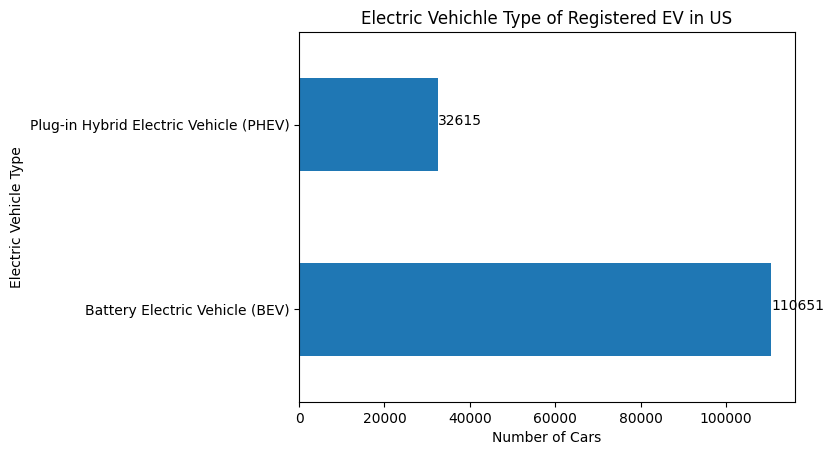

In [ ]:
evt = df_pop['Electric Vehicle Type'].value_counts()

# plot the counts
evt.plot.barh()
plt.xlabel('Number of Cars')
plt.ylabel('Electric Vehicle Type')
plt.title('Electric Vehichle Type of Registered EV in US')

for index, value in enumerate(evt):
    plt.text(value, index,
             str(value))

plt.show()

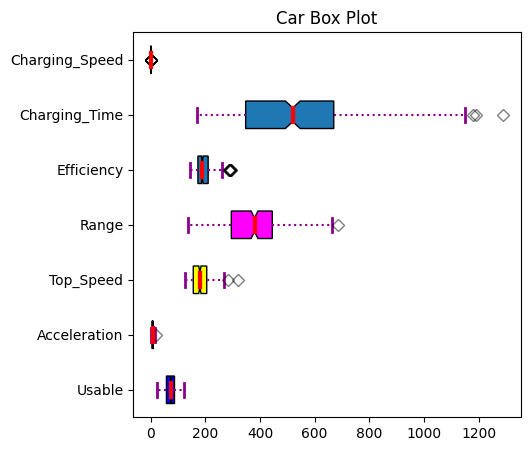

In [ ]:
#BoxPlot
np.random.seed(10)

Usable_battery = df_car_model['Usable Battery']
Acceleration =  df_car_model['Acceleration']
Top_Speed= df_car_model['Top Speed']
Range =  df_car_model['Range']
Efficiency = df_car_model['Efficiency']
Charging_Time = df_car_model['Charging capacity']
Charging_Speed = df_car_model['Charging Speed (hour)']
data = [Usable_battery, Acceleration, Top_Speed,Range ,Efficiency,Charging_Time,Charging_Speed]

fig = plt.figure(figsize =(5,5))
ax = fig.add_subplot(111)

bp = ax.boxplot(data, patch_artist = True,
                notch ='True', vert = 0)

colors = ['#0000FF', '#00FF00',
          '#FFFF00', '#FF00FF']

for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

for whisker in bp['whiskers']:
    whisker.set(color ='#8B008B',
                linewidth = 1.5,
                linestyle =":")

for cap in bp['caps']:
    cap.set(color ='#8B008B',
            linewidth = 2)


for median in bp['medians']:
    median.set(color ='red',
               linewidth = 3)


for flier in bp['fliers']:
    flier.set(marker ='D',
              color ='#e7298a',
              alpha = 0.5)

ax.set_yticklabels([ 'Usable' , 'Acceleration' , 'Top_Speed','Range',
                    'Efficiency','Charging_Time','Charging_Speed'])

plt.title("Car Box Plot")

ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

plt.show()

In [ ]:
efficiency_car = df_car_model.sort_values(by=['Efficiency'], ascending=True)
efficiency_car.head(n=3)

,Model,Usable Battery,Year,Acceleration,Top Speed,Range,Efficiency,Charging capacity,Charging Speed (hour)
1,Tesla Model 3,57.5,2021,6.1,225.0,405.0,142.0,680.0,0.595588
131,Hyundai IONIQ 6 Standard Range 2WD,54.0,2023,8.8,185.0,365.0,148.0,900.0,0.405556
49,Hyundai IONIQ 6 Long Range 2WD,74.0,2022,7.4,185.0,495.0,149.0,1290.0,0.383721


In [ ]:
acl_car = df_car_model.sort_values(by=['Acceleration'], ascending=True)
acl_car.head(n=3)

,Model,Usable Battery,Year,Acceleration,Top Speed,Range,Efficiency,Charging capacity,Charging Speed (hour)
12,Tesla Model S Plaid,95.0,2022,2.1,282.0,560.0,170.0,780.0,0.717949
87,Tesla Model X Plaid,95.0,2022,2.6,262.0,455.0,209.0,630.0,0.722222
197,Maserati GranTurismo Folgore,83.0,2023,2.7,320.0,425.0,195.0,990.0,0.429293


In [ ]:
range_car = df_car_model.sort_values(by=['Range'], ascending=False)
range_car.head(n=3)

,Model,Usable Battery,Year,Acceleration,Top Speed,Range,Efficiency,Charging capacity,Charging Speed (hour)
84,Lucid Air Dream Edition R,118.0,2022,2.9,270.0,685.0,172.0,870.0,0.787356
173,Lucid Air Grand Touring,112.0,2023,3.0,270.0,665.0,168.0,840.0,0.791667
193,Lucid Air Dream Edition P,118.0,2022,2.7,270.0,665.0,177.0,840.0,0.791667


In [ ]:
speed_car = df_car_model.sort_values(by=['Top Speed'], ascending=False)
speed_car.head(n=3)

,Model,Usable Battery,Year,Acceleration,Top Speed,Range,Efficiency,Charging capacity,Charging Speed (hour)
197,Maserati GranTurismo Folgore,83.0,2023,2.7,320.0,425.0,195.0,990.0,0.429293
12,Tesla Model S Plaid,95.0,2022,2.1,282.0,560.0,170.0,780.0,0.717949
173,Lucid Air Grand Touring,112.0,2023,3.0,270.0,665.0,168.0,840.0,0.791667


In [ ]:
charge_car = df_car_model.sort_values(by=['Charging Speed (hour)'], ascending=True)
charge_car.head(n=3)

,Model,Usable Battery,Year,Acceleration,Top Speed,Range,Efficiency,Charging capacity,Charging Speed (hour)
80,Kia EV6 Long Range AWD,74.0,2021,5.2,185.0,400.0,185.0,1050.0,0.380952
88,Hyundai IONIQ 5 Long Range AWD,74.0,2022,5.1,185.0,385.0,192.0,1010.0,0.381188
196,Genesis GV60 Premium,74.0,2022,7.8,185.0,390.0,190.0,1020.0,0.382353


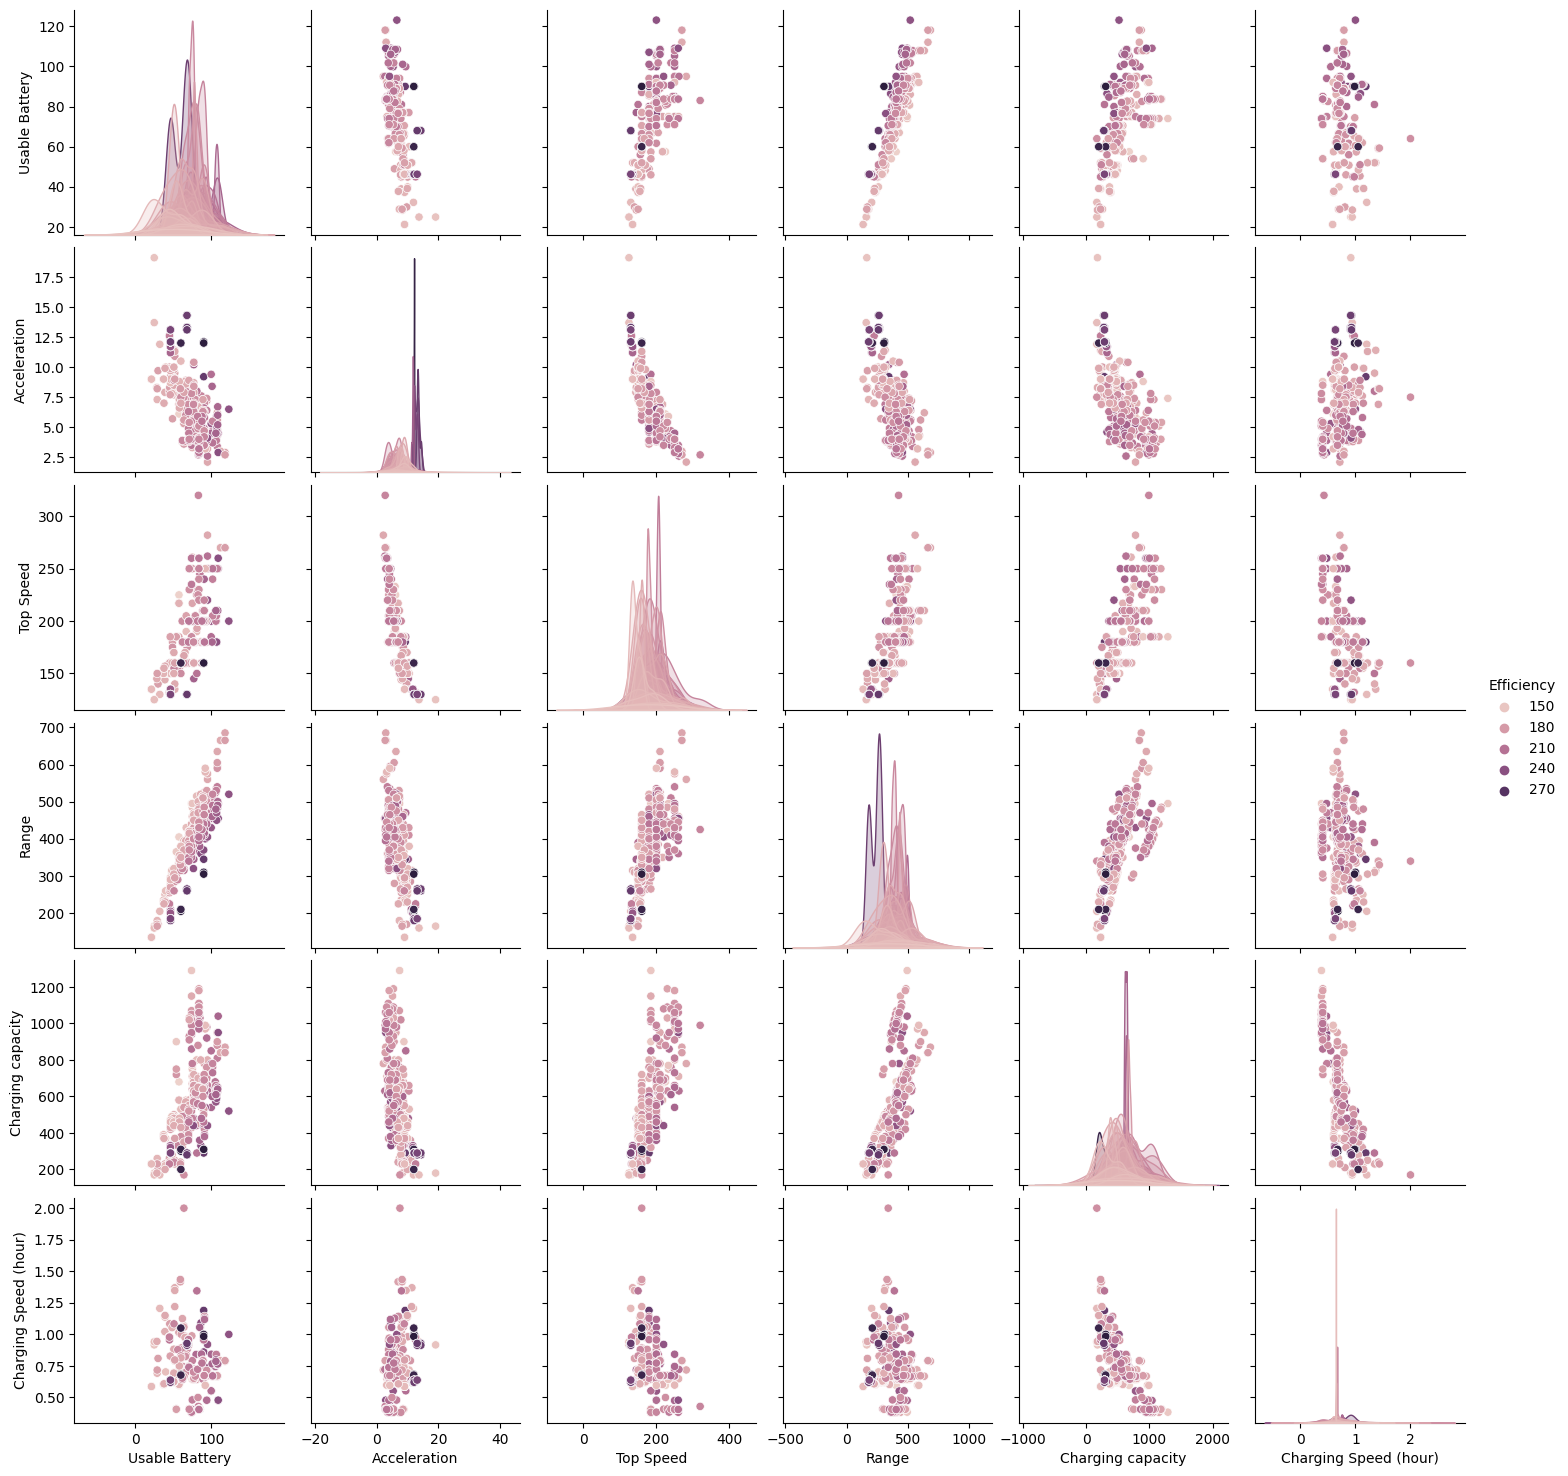

In [ ]:
sns.pairplot(df_car_model,hue='Efficiency')

<ipython-input-42-0a193883bf03>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



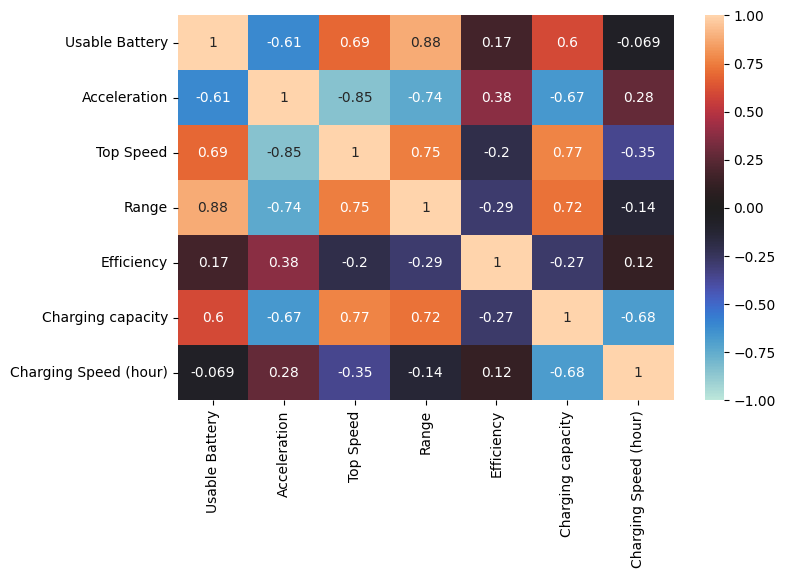

In [ ]:
#Using heatmap to find correlation
corr = df_car_model.corr()
plt.subplots(figsize=(8,5))
sns.heatmap(corr, vmin=-1, center=0, vmax=1, annot= True)
plt.show()

# Data Splitting and Feature Selection

In [ ]:
from sklearn.model_selection import train_test_split

X = df_car_model.drop(['Model', 'Year', 'Efficiency', 'Charging Speed (hour)'],axis=1)
Y = df_car_model['Efficiency']

X_train, X_test, Y_train, Y_test =  train_test_split(X, Y, test_size = 0.3, random_state = 42)

# Model Building and Training

Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

#create a linear regression
lr = LinearRegression()

In [ ]:
lr.fit(X_train, Y_train) #training the model using the training data

LinearRegression()

In [ ]:
#Predict
lr_prediction = lr.predict(X_test)
lr_prediction[0:5]

array([238.60278028, 199.62845587, 233.87998578, 231.08868173,
       188.16693183])

Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor

#build decision tree object
dtree = DecisionTreeRegressor(random_state = 42)

In [ ]:
dtree.fit(X_train, Y_train) #training the model using the training data

DecisionTreeRegressor(random_state=42)

In [ ]:
#predict
dtree_prediction = dtree.predict(X_test)
dtree_prediction[0:5]

array([230., 192., 257., 214., 186.])

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

#create a random forest regressor
rf = RandomForestRegressor(n_estimators=10, random_state=42)

In [ ]:
rf.fit(X_train, Y_train) #training the model using the training data

RandomForestRegressor(n_estimators=10, random_state=42)

In [ ]:
#predict
rf_prediction = rf.predict(X_test)
rf_prediction[0:5]

array([225.1, 193.9, 257. , 220.9, 193.8])

Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Create a Gradient Boosting Regressor
gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)

In [ ]:
# Train the model on the train data
gb.fit(X_train, Y_train)

GradientBoostingRegressor()

In [ ]:
gb_pred = gb.predict(X_test)
gb_pred[0:5]

array([230.64338568, 193.80230766, 254.18925013, 218.20807388,
       190.76023381])

# Model Evaluation

Scatter Plot

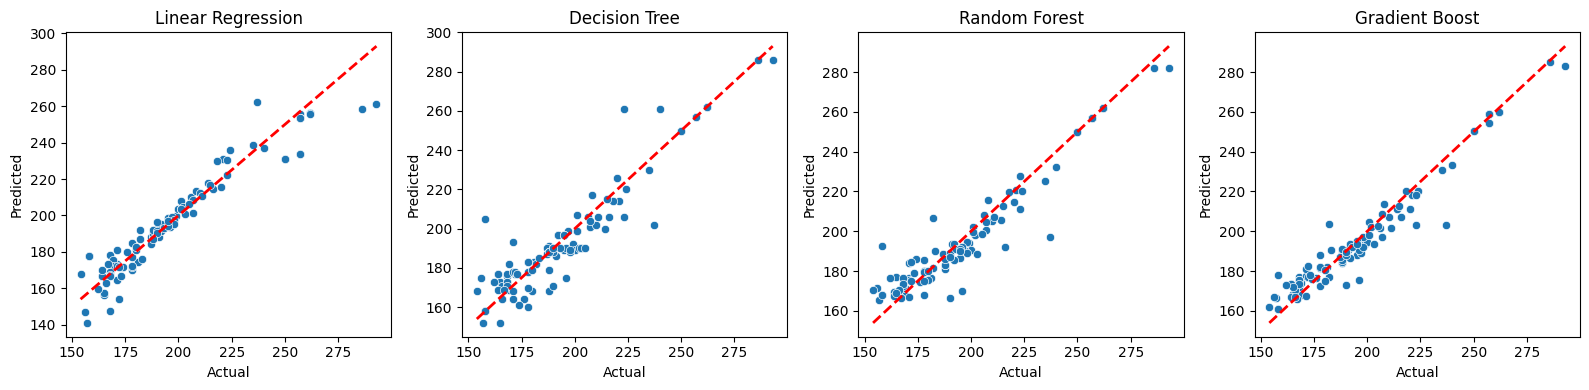

In [ ]:
fig, ax = plt.subplots(1, 4, figsize=(16, 4))

# Linear Regression
sns.scatterplot(x=Y_test, y=lr_prediction, ax=ax[0])
ax[0].set_title('Linear Regression')
ax[0].set_xlabel('Actual')
ax[0].set_ylabel('Predicted')
ax[0].plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linestyle='--', linewidth=2)

# Decision Tree
sns.scatterplot(x=Y_test, y=dtree_prediction, ax=ax[1])
ax[1].set_title('Decision Tree')
ax[1].set_xlabel('Actual')
ax[1].set_ylabel('Predicted')
ax[1].plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linestyle='--', linewidth=2)

# Random Forest
sns.scatterplot(x=Y_test, y=rf_prediction, ax=ax[2])
ax[2].set_title('Random Forest')
ax[2].set_xlabel('Actual')
ax[2].set_ylabel('Predicted')
ax[2].plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linestyle='--', linewidth=2)

#Gradient Boost
sns.scatterplot(x=Y_test, y=gb_pred, ax=ax[3])
ax[3].set_title('Gradient Boost')
ax[3].set_xlabel('Actual')
ax[3].set_ylabel('Predicted')
ax[3].plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linestyle='--', linewidth=2)

plt.tight_layout()
plt.show()

Distribution Value

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#Linear Regression
lr_pred_r2 = r2_score(Y_test, lr_prediction)
lr_pred_mse = mean_squared_error(Y_test, lr_prediction)
lr_pred_mae = mean_absolute_error(Y_test, lr_prediction)

#Decision Tree
dtree_pred_r2 = r2_score(Y_test, dtree_prediction)
dtree_pred_mse = mean_squared_error(Y_test, dtree_prediction)
dtree_pred_mae = mean_absolute_error(Y_test, dtree_prediction)

#Random Forest
rf_pred_r2 = r2_score(Y_test, rf_prediction)
rf_pred_mse = mean_squared_error(Y_test, rf_prediction)
rf_pred_mae = mean_absolute_error(Y_test, rf_prediction)

#Gradient Boost
gb_pred_r2 = r2_score(Y_test, gb_pred)
gb_pred_mse = mean_squared_error(Y_test, gb_pred)
gb_pred_mae = mean_absolute_error(Y_test, gb_pred)

print('Linear Reression')
print('r2 score:', lr_pred_r2)
print('mse score:', lr_pred_mse)
print('mae score:', lr_pred_mae)
print('')

print('Decision Tree')
print('r2 score:', dtree_pred_r2)
print('mse score:', dtree_pred_mse)
print('mae score:', dtree_pred_mae)
print('')

print('Random Forest')
print('r2 score:', rf_pred_r2)
print('mse score:', rf_pred_mse)
print('mae score:', rf_pred_mae)
print('')

print('Gradient Boost')
print('r2 score:', gb_pred_r2)
print('mse score:', gb_pred_mse)
print('mae score:', gb_pred_mae)


Linear Reression
r2 score: 0.9134237322519088
mse score: 81.93588973491133
mae score: 6.05704389217962

Decision Tree
r2 score: 0.8790606622111363
mse score: 114.45714285714286
mae score: 7.0095238095238095

Random Forest
r2 score: 0.9085863441259857
mse score: 86.514
mae score: 6.162857142857142

Gradient Boost
r2 score: 0.941507915553387
mse score: 55.356982995937386
mae score: 5.264922107270218


Based on number we can say:

The Gradient Boosting model seems to be performing the best among the models you've compared. It has the highest R2 score, lowest MSE, and lowest MAE, indicating that it's explaining the variance well and providing accurate predictions on this dataset.

# Hyperparameter Tunning

In [ ]:
from sklearn.model_selection import GridSearchCV

parameter_grid = {
    'n_estimators': [150, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

gb_reg = GradientBoostingRegressor()
grid_search = GridSearchCV(gb_reg, parameter_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [150, 200, 300]},
             scoring='neg_mean_squared_error')

In [ ]:
best_parameter = grid_search.best_params_
print("Best Parameters:", best_parameter)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 200}


In [ ]:
gb_bestmodel = grid_search.best_estimator_

In [ ]:
gb_predictions = gb_bestmodel.predict(X_test)

In [ ]:
gb2_pred_r2 = r2_score(Y_test, gb_predictions)
gb2_pred_mse = mean_squared_error(Y_test, gb_predictions)
gb2_pred_mae = mean_absolute_error(Y_test, gb_predictions)

print('Gradient Boost')
print('r2 score:', gb2_pred_r2)
print('mse score:', gb2_pred_mse)
print('mae score:', gb2_pred_mae)

Gradient Boost
r2 score: 0.9365532128180125
mse score: 60.04611995638178
mae score: 4.5589708399584925
